## Read data

In [118]:
import numpy as np

In [119]:
def rdnumpy(txtname):
    f = open(txtname)
    line = f.readlines()
    lines = len(line)  # row number
    for l in line:
        le = l.strip('\n').split(',')
        columns = len(le)-1  # col
        #print(le)
        #print(columns)
 
    A = np.zeros((lines, columns+1), dtype=np.single)
    print("read lines:",lines)
    print("read columns:",columns+1)
    A_row = 0
    for lin in line:
        #print(A_row)
        list = lin.strip('\n').split(',')
        A[A_row:] = list[0:columns+1]
        A_row += 1
    return A

# Model begin

In [120]:
import numpy as np
import torch
from torch.utils.data import Dataset,DataLoader
from torchvision.transforms import ToTensor, ToPILImage, Lambda
import matplotlib.pyplot as plt
import os
import pandas as pd
from PIL import Image
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## set the parameters

In [121]:
n_epochs = 3
batch_size_train = 16 #32,或者16-由於數據集比較小
batch_size_test = 725*2
learning_rate = 0.0001 #0.0001
momentum = 0.5
log_interval = 10
random_seed = 1
torch.manual_seed(random_seed)

## data loader

In [122]:
class ScottTrainDataset(Dataset):
    def __init__(self, transform=None, target_transform=None):
        TrainDataf1=torch.as_tensor(rdnumpy("D:\FYP-HPC\Data_Python\CNN_DSMsFilter_16Fea\MTrainGf1.txt"))
        TrainDataw0=torch.as_tensor(rdnumpy("D:\FYP-HPC\Data_Python\CNN_DSMsFilter_16Fea\MTrainGw0.txt"))
        
        self.AllTrainData=torch.cat((TrainDataw0,TrainDataf1),0)
        # 定义transform
        self.transform = transform
        self.target_transform = target_transform
 
    def __len__(self):
        '''返回数据集中的样本数'''
        return 1725*2
 
    def __getitem__(self, index):#需要第index個的數據
        '''获取数据的方法，会和Dataloader连用'''
        i=index;        
        startRow=i*8;
        enRow=(i+1)*8;
        nowData=self.AllTrainData[startRow:enRow,2:18]
        
        nowLabel=1
        if index>=1725:
            nowLabel=0
            
        if self.transform:
            nowData = self.transform(nowData)
        if self.target_transform:
            nowLabel = self.target_transform(nowLabel)
        '''
        if nowLabel==0:
            nowLabel = torch.FloatTensor([1, 0])
        else:
            nowLabel = torch.FloatTensor([0, 1])
        '''
        return nowData, nowLabel#需要返回數據和標簽

In [123]:
class ScottTestDataset(Dataset):
    def __init__(self, transform=None, target_transform=None):
        TestDataf1=torch.as_tensor(rdnumpy("D:\FYP-HPC\Data_Python\CNN_DSMsFilter_16Fea\MTestGf1.txt"))
        TestDataw0=torch.as_tensor(rdnumpy("D:\FYP-HPC\Data_Python\CNN_DSMsFilter_16Fea\MTestGw0.txt"))
        
        self.AllTrainData=torch.cat((TestDataw0,TestDataf1),0)
        # 定义transform
        self.transform = transform
        self.target_transform = target_transform
 
    def __len__(self):
        '''返回数据集中的样本数'''
        return 725*2
 
    def __getitem__(self, index):#需要第index個的數據
        '''获取数据的方法，会和Dataloader连用'''
        i=index;        
        startRow=i*8;
        enRow=(i+1)*8;
        nowData=self.AllTrainData[startRow:enRow,2:18]
        
        nowLabel=1
        if index>=725:
            nowLabel=0
            
        if self.transform:
            nowData = self.transform(nowData)
        if self.target_transform:
            nowLabel = self.target_transform(nowLabel)
            
        '''
        if nowLabel==0:
            nowLabel = torch.FloatTensor([1, 0])
        else:
            nowLabel = torch.FloatTensor([0, 1])
        '''
            
        return nowData, nowLabel#需要返回數據和標簽

In [124]:
train_loader = torch.utils.data.DataLoader(ScottTrainDataset(),
    batch_size=batch_size_train, shuffle=True)


test_loader = torch.utils.data.DataLoader(ScottTestDataset(),
    batch_size=batch_size_test, shuffle=True)

read lines: 13800
read columns: 19
read lines: 13800
read columns: 19
read lines: 5800
read columns: 19
read lines: 5800
read columns: 19


In [125]:
#for batch_idx, (data, target) in enumerate(train_loader):
    #print (batch_idx)
    #print(data, target)
    #print(target)

# Net Work

In [126]:
'''
#https://zhuanlan.zhihu.com/p/199624393
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(10,20, kernel_size=3, padding=1)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(20*2*4, 30)
        self.fc2 = nn.Linear(30, 2)
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 20*2*4)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        #return x
        return F.log_softmax(x, dim=-1)
'''
6

6

In [127]:
#https://zhuanlan.zhihu.com/p/199624393
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(10,20, kernel_size=3, padding=1)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(20*2*4, 30)
        self.fc2 = nn.Linear(30, 2)
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 20*2*4)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        #return x
        return F.log_softmax(x, dim=-1)

In [128]:
network = Net()
optimizer = optim.Adam(network.parameters(), lr=learning_rate)

In [129]:
#https://zhuanlan.zhihu.com/p/199624393
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, kernel_size=2, padding=1)
        self.conv2 = nn.Conv2d(20,40, kernel_size=2, padding=1)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 60)#60
        self.fc2 = nn.Linear(60, 2)
    def forward(self, x):
        ##print(x)#
        #print(x.shape)
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        #print("relu1:")
        #print(x.shape)
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        #print("relu2:")
        #print(x.shape)
        x = x.view(-1,320)
        #print("view:")
        #print(x.shape)
        x = F.relu(self.fc1(x))
        #print("relu3:")
        #print(x.shape)
        x = F.dropout(x, training=self.training) 
        #print("dropout")
        #print(x.shape)
        x = self.fc2(x)
        #print("FULL con")
        #print(x.shape)
        x= F.log_softmax(x, dim=-1)
        #print("softmax")
        #print(x.shape)
        return x
        #return F.log_softmax(x, dim=-1)
        
network = Net()
optimizer = optim.Adam(network.parameters(), lr=learning_rate)

In [130]:
#help(nn.Conv2d)

# Train

In [131]:
#print(data)

In [132]:
train_losses = []
train_counter = []

def train(epoch):
  for _ in range(epoch):
      network.train()
      for batch_idx, (data, target) in enumerate(train_loader):
        if batch_idx>1920 and batch_idx<1920+320: continue
        optimizer.zero_grad()
        data = data.unsqueeze(1)
        output = network(data)
        #print(target.shape, target, output)
        #assert 1==0
        # loss = F.binary_cross_entropy_with_logits(output, target)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

        '''
        print(torch.isnan(data).sum(), (target==1).sum()+(target==0).sum())
        assert (target==1).sum()+(target==0).sum()==16
        print(torch.isnan(data).sum(), target.shape, target, output)
        if torch.isnan(output).sum()!=0:
            print(data, target, torch.isnan(data).sum())
            print(data[-5])
        assert torch.isnan(output).sum()==0
        assert torch.isnan(loss).sum()==0
        '''
        if batch_idx % log_interval == 0:
          #print(torch.isnan(data).sum(), target.shape, target, output)
          print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.item()))
          train_losses.append(loss.item())
          train_counter.append(
            (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
          torch.save(network.state_dict(), './model.pth')
          torch.save(optimizer.state_dict(), './optimizer.pth')
    
train(10)

Train Epoch: 10 [0/3450 (0%)]	Loss: 6.086843
Train Epoch: 10 [160/3450 (5%)]	Loss: 0.961436
Train Epoch: 10 [320/3450 (9%)]	Loss: 0.228791
Train Epoch: 10 [480/3450 (14%)]	Loss: 0.070661
Train Epoch: 10 [640/3450 (19%)]	Loss: 0.046323
Train Epoch: 10 [800/3450 (23%)]	Loss: 0.020476
Train Epoch: 10 [960/3450 (28%)]	Loss: 0.045788
Train Epoch: 10 [1120/3450 (32%)]	Loss: 0.090380
Train Epoch: 10 [1280/3450 (37%)]	Loss: 0.012134
Train Epoch: 10 [1440/3450 (42%)]	Loss: 0.009214
Train Epoch: 10 [1600/3450 (46%)]	Loss: 0.015368
Train Epoch: 10 [1760/3450 (51%)]	Loss: 0.001870
Train Epoch: 10 [1920/3450 (56%)]	Loss: 0.005040
Train Epoch: 10 [2080/3450 (60%)]	Loss: 0.007315
Train Epoch: 10 [2240/3450 (65%)]	Loss: 0.019092
Train Epoch: 10 [2400/3450 (69%)]	Loss: 0.003692
Train Epoch: 10 [2560/3450 (74%)]	Loss: 0.084701
Train Epoch: 10 [2720/3450 (79%)]	Loss: 0.017488
Train Epoch: 10 [2880/3450 (83%)]	Loss: 0.023945
Train Epoch: 10 [3040/3450 (88%)]	Loss: 0.003752
Train Epoch: 10 [3200/3450 (93%)

Train Epoch: 10 [2720/3450 (79%)]	Loss: 0.005507
Train Epoch: 10 [2880/3450 (83%)]	Loss: 0.442014
Train Epoch: 10 [3040/3450 (88%)]	Loss: 0.001378
Train Epoch: 10 [3200/3450 (93%)]	Loss: 0.004072
Train Epoch: 10 [3360/3450 (97%)]	Loss: 0.000159
Train Epoch: 10 [0/3450 (0%)]	Loss: 0.000618
Train Epoch: 10 [160/3450 (5%)]	Loss: 0.017304
Train Epoch: 10 [320/3450 (9%)]	Loss: 0.000285
Train Epoch: 10 [480/3450 (14%)]	Loss: 0.000260
Train Epoch: 10 [640/3450 (19%)]	Loss: 0.001603
Train Epoch: 10 [800/3450 (23%)]	Loss: 0.000730
Train Epoch: 10 [960/3450 (28%)]	Loss: 0.001167
Train Epoch: 10 [1120/3450 (32%)]	Loss: 0.019825
Train Epoch: 10 [1280/3450 (37%)]	Loss: 0.001022
Train Epoch: 10 [1440/3450 (42%)]	Loss: 0.000119
Train Epoch: 10 [1600/3450 (46%)]	Loss: 0.000069
Train Epoch: 10 [1760/3450 (51%)]	Loss: 0.026027
Train Epoch: 10 [1920/3450 (56%)]	Loss: 0.000539
Train Epoch: 10 [2080/3450 (60%)]	Loss: 0.004526
Train Epoch: 10 [2240/3450 (65%)]	Loss: 0.001220
Train Epoch: 10 [2400/3450 (69%)

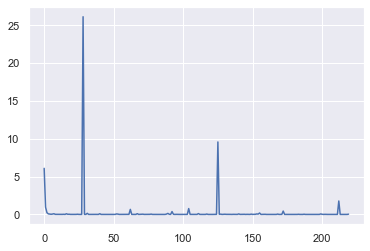

In [133]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import matplotlib.pyplot as plt

plt.plot(list(range(len(train_losses))), train_losses)
plt.show()

In [134]:

test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]          


In [135]:
'''
for p in network.parameters():
    print(p)
    break
tmp = torch.load('./model.pth')
network.load_state_dict(tmp)
for p in network.parameters():
    print(p)
    break
'''

"\nfor p in network.parameters():\n    print(p)\n    break\ntmp = torch.load('./model.pth')\nnetwork.load_state_dict(tmp)\nfor p in network.parameters():\n    print(p)\n    break\n"

In [136]:
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      data = data.unsqueeze(1)
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      #print(pred)
      correct += pred.eq(target.data.view_as(pred)).sum()
      
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))
    
test()


Test set: Avg. loss: 0.3136, Accuracy: 1363/1450 (94%)



C:\Users\PCI\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [137]:
  import scipy.io as io
  test_losses = []
  test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      data = data.unsqueeze(1)
      #print("data:")
      #print(data.shape)
      output = network(data)
      #print("output:")
      #print(output.shape)
      
      test_loss += F.nll_loss(output, target, size_average=False).item()
      #print(output)
      pred = output.data.max(1, keepdim=True)[1]
      #print(pred)##
      #print(target)
      result1 = np.array(pred)
      np.savetxt('pred.txt',result1)
      result2 = np.array(target)
      np.savetxt('target.txt',result2)
      
      #Save done
      correct += pred.eq(target.data.view_as(pred)).sum()
      
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))


Test set: Avg. loss: 0.3136, Accuracy: 1363/1450 (94%)



In [138]:
'''
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.show()
'''

"\nfor epoch in range(1, n_epochs + 1):\n  train(epoch)\n  test()\nimport matplotlib.pyplot as plt\nfig = plt.figure()\nplt.plot(train_counter, train_losses, color='blue')\nplt.scatter(test_counter, test_losses, color='red')\nplt.legend(['Train Loss', 'Test Loss'], loc='upper right')\nplt.xlabel('number of training examples seen')\nplt.ylabel('negative log likelihood loss')\nplt.show()\n"

[[638  87]
 [  0 725]]


[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Acute')]

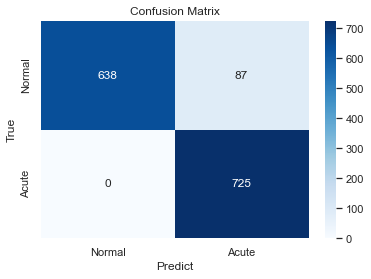

In [139]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

sns.set()
f,ax = plt.subplots()
y_true =(target)
y_pred = (pred)
C2 = confusion_matrix(y_true,y_pred,labels=[0,1])
#打印 C2

print(C2)
a=sns.heatmap(C2,annot=True,ax=ax, cmap = 'Blues', fmt='g') #画热力图  , cbar = None

ax.set_title('Confusion Matrix') #标题
ax.set_xlabel('Predict') #x 轴
ax.set_ylabel('True') #y 轴

#Normal, Acute, Chronic, Pre-seizure
a.set_xticklabels(['Normal','Acute'])
a.set_yticklabels(['Normal','Acute'])

In [140]:
from sklearn.metrics import f1_score
 
y_true = target
y_pred = pred
 
print(f1_score(y_true, y_pred, average='weighted'))# unbalance F1
print(f1_score(y_true, y_pred, average='macro'))

0.939783219590526
0.939783219590526


[[ 88.  12.]
 [  0. 100.]]


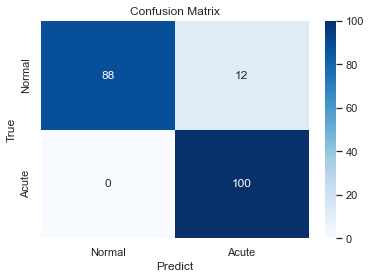

In [141]:

sns.set()
f,ax = plt.subplots()
y_true =(target)
y_pred = (pred)
C2 = confusion_matrix(y_true,y_pred,labels=[0,1])

fm=C2.sum(axis=1)
C3=C2/fm*100
C3=np.around(C3,decimals=2)

print(C3)
a=sns.heatmap(C3,annot=True,ax=ax, cmap = 'Blues', fmt='g') #画热力图  , cbar = None

ax.set_title('Confusion Matrix') #标题
ax.set_xlabel('Predict') #x 轴
ax.set_ylabel('True') #y 轴


#Normal, Acute, Chronic, Pre-seizure
a.set_xticklabels(['Normal','Acute'])
a.set_yticklabels(['Normal','Acute'])

fig = a.get_figure()
fig.savefig("16F_2C.png", dpi=1080)